In [1]:
# Logistic Regression, KNN, Support vector machine, Desicion Tree, Ensemble models, Unbalanced data

In [162]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression     #Regression Logistic
from sklearn.neighbors import KNeighborsClassifier      # KNear Neighbors
from sklearn.svm import SVC                             # Support Vector Machines

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score

In [3]:
data = pd.read_csv("Crop_Recommendation.csv")

In [5]:
data.head(3)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
X = data[data.columns[:-1]]
Y = data[["Crop"]]

<Axes: xlabel='Crop'>

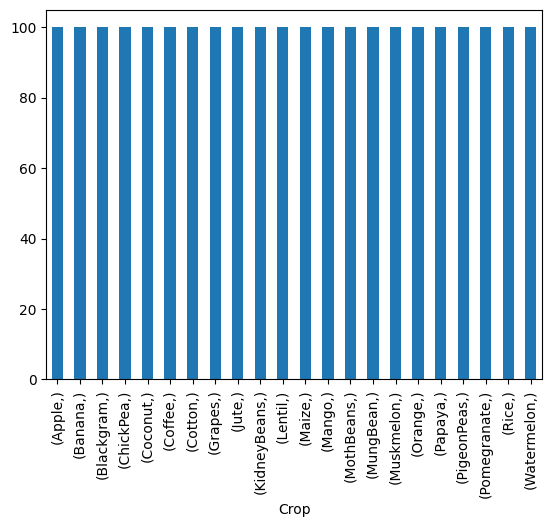

In [10]:
Y.value_counts().plot.bar()

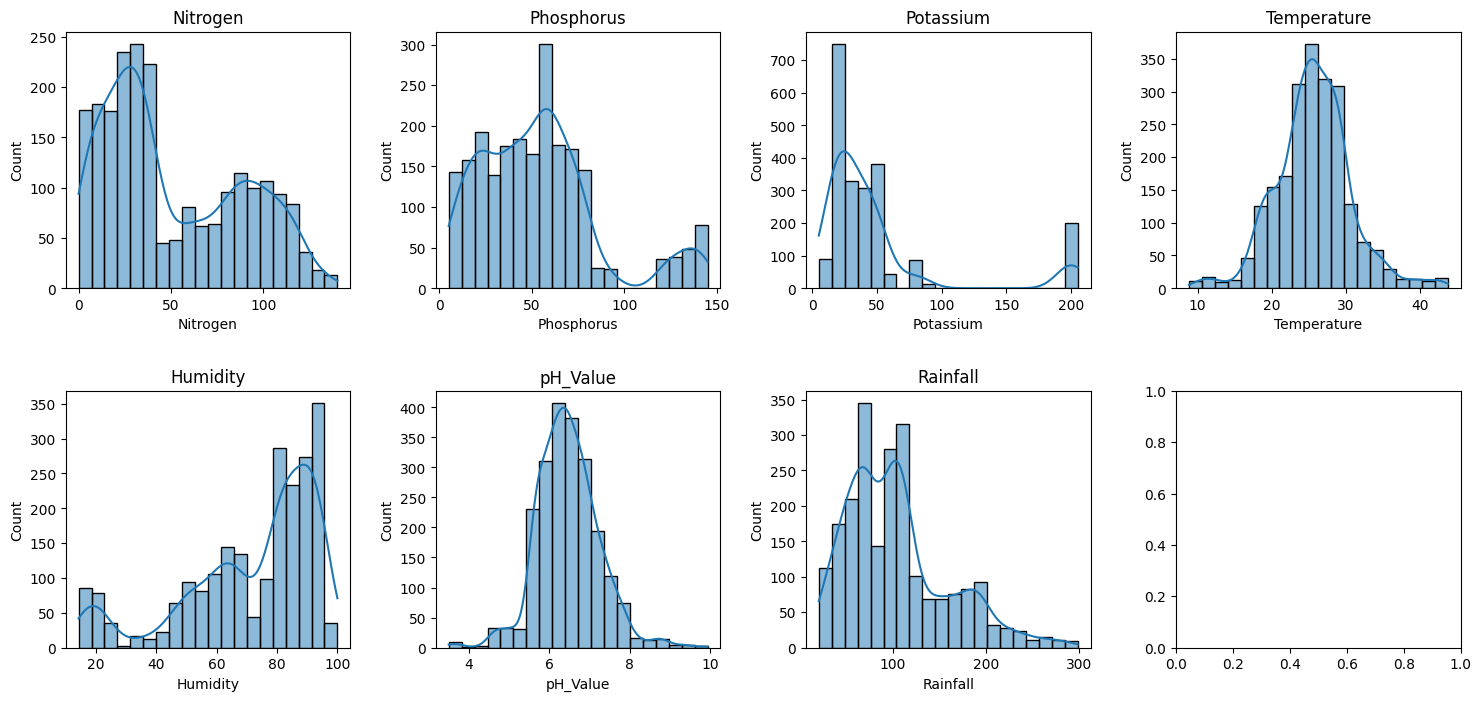

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18,8))

# Plot KDE plots for each column
for i, ax in enumerate(axes.ravel()):
    if i!=7:
        sns.histplot(X.iloc[:,i], kde=True, ax=ax, bins=20)
        ax.set_title(f'{X.columns[i]}', fontsize=12)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


# Logistic Regression

In [15]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

label_encoder = LabelEncoder()
Y_enco = label_encoder.fit_transform(Y.values.ravel())

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y_enco, 
                                                    test_size=0.2, 
                                                    stratify=Y_enco, 
                                                    random_state=10)

In [143]:
score1 = []
C = np.linspace(0.2,2,20)
for i,c in enumerate(C):
    lr = LogisticRegression(random_state=20,  max_iter=1000, penalty='l1', C=c, solver='saga')
    lr.fit(X_train, Y_train)
    lr_pred = lr.predict(X_test)
    score1.append(fbeta_score(Y_test,lr_pred, beta=1, average='micro'))

score2 = []
for i,c in enumerate(C):
    lr = LogisticRegression(random_state=20,  max_iter=1000, penalty='l2', C=c, solver='saga')
    lr.fit(X_train, Y_train)
    lr_pred = lr.predict(X_test)
    score2.append(fbeta_score(Y_test, lr_pred, beta=1, average='micro'))

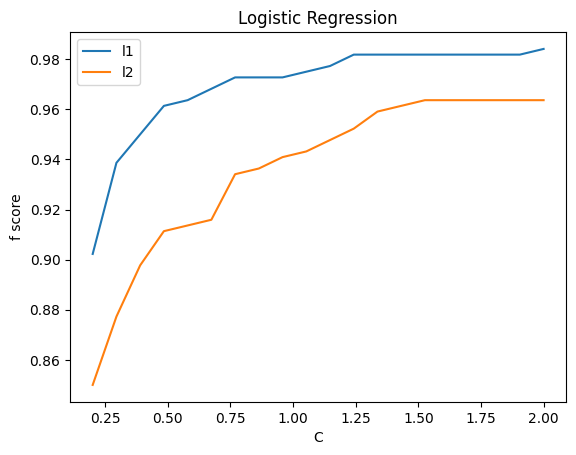

In [148]:
plt.plot(C, score1, label="l1")
plt.plot(C, score2, label="l2")
plt.xlabel("C")
plt.ylabel("f score")
plt.title("Logistic Regression")
plt.legend()
plt.show()

In [159]:
max(score1)

np.float64(0.9840909090909091)

In [146]:
model_lr = LogisticRegression(random_state=20, 
                              max_iter=1000, 
                              solver='saga', 
                              C=1.5,
                              penalty='l1')

In [ ]:
# feature importance

# KNN

In [150]:
max_k = 50
f1_scores = []

In [154]:
for i in range(1,max_k):
    knn = KNeighborsClassifier( n_neighbors=i )
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)

    f1_scores.append( fbeta_score(Y_test, pred, beta=1, average='micro') )
    

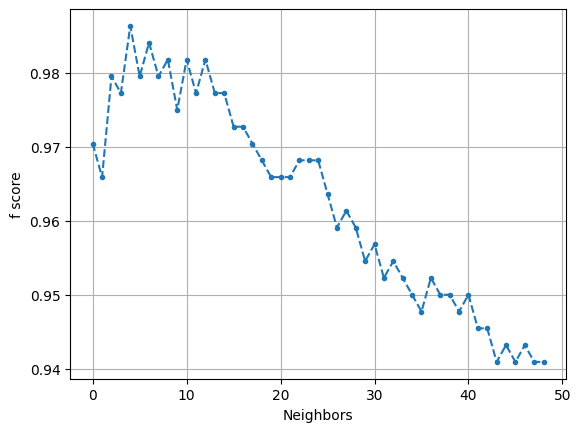

In [158]:
plt.plot(f1_scores, "--.")
plt.ylabel("f score")
plt.xlabel('Neighbors')
plt.grid()

In [160]:
max(f1_scores)

np.float64(0.9863636363636363)

In [161]:
model_knn = KNeighborsClassifier( n_neighbors=5 )

# SVM

# Desicion Tree

# Ensemble models

In [92]:
Input = [('model', LogisticRegression(random_state=20, max_iter=1000))]
pipe = Pipeline(Input)

In [93]:
param_grid = {
    "model__penalty":['l1','l2'],
    "model__C":np.linspace(0.1,1,10)
}

In [94]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [95]:
pipe.fit(X_train, Y_train)
search.fit(X_test, Y_test)

/mnt/c/Users/USUARIO/Documents/galois/IBM-Machine-Learning/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/mnt/c/Users/USUARIO/Documents/galois/IBM-Machine-Learning/.env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/mnt/c/Users/USUARIO/Documents/galois/IBM-Machine-Learning/.env/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/mnt/c/Use

GridSearchCV(estimator=Pipeline(steps=[('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=20))]),
             n_jobs=1,
             param_grid={'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'model__penalty': ['l1', 'l2']})

In [46]:
best=search.best_estimator_

In [47]:
best

Pipeline(steps=[('model',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    random_state=20, solver='saga'))])

In [ ]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)
param_grid = {
    "polynomial__degree": [1, 2, 3],
    "model__normalize":[True, False]
}
search = GridSearchCV(pipe, param_grid, n_jobs=1)
pipe.fit(X_train, y_train)
search.fit(X_test, y_test)
best=search.best_estimator_
best

In [ ]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

# Define a logistic regression model with above arguments
l2_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [ ]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000

l1_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000)

# elasticnet penalty to shrink coefficients without removing any features from the model
penalty= 'elasticnet'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 1000
# l1_ratio
l1_ratio = 0.1
en_model = LogisticRegression(random_state=rs, penalty=penalty, multi_class=multi_class, solver=solver, max_iter = 1000, l1_ratio=l1_ratio)
